# All coding and testing executed on Google Colab

# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data from GitHub

In [3]:
url='https://raw.githubusercontent.com/mirokr/ml/main/boats_price_cleaned.csv'

data = pd.read_csv(url)
df = data

# Alternative-data from local

In [3]:
# df = pd.read_csv('boats_price_cleaned.csv')

# Examine

In [4]:
df.shape

(9331, 17)

In [5]:
df.head()

,Boat_Type,Type,Year_Built,Length,Width,Displacement,Category,People,Cabins,Toilets,Material,Water,Propulsion,Fuel_Capacity,Fuel_Type,Engine_Hours,Price
0,2.0,1.0,2017.0,4.00,1.90,811.7,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3118.7
1,0.0,1.0,2020.0,4.00,1.50,150.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3490.0
2,1.0,1.0,2020.0,3.00,1.00,110.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3481.2
3,0.0,0.0,1974.0,6.30,2.50,2000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,0.0,500.0,3503.5
4,6.0,1.0,2019.0,3.55,1.46,84.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3399.0


In [6]:
df.describe()

,Boat_Type,Type,Year_Built,Length,Width,Displacement,Category,People,Cabins,Toilets,Material,Water,Propulsion,Fuel_Capacity,Fuel_Type,Engine_Hours,Price
count,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9.331000e+03,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9.331000e+03
mean,1.922409,0.212625,2005.152395,11.164514,3.453523,1.359706e+04,1.193334,3.350445,1.302218,0.352374,3.058407,83.719323,0.691459,826.815775,2.811167,474.272854,2.084468e+05
std,1.739332,0.409186,15.700121,4.690538,1.028995,8.567023e+04,0.685263,15.572801,1.241207,0.801352,1.885841,257.186566,1.142791,1529.071961,1.565959,900.218806,3.301916e+05
min,0.000000,0.000000,1885.000000,1.150000,0.500000,1.000000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.118700e+03
25%,0.000000,0.000000,1999.000000,7.500000,2.550000,2.500000e+03,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,4.245750e+04
50%,2.000000,0.000000,2008.000000,10.300000,3.330000,8.809100e+03,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,280.000000,3.000000,200.000000,8.950000e+04
75%,3.000000,0.000000,2018.000000,13.780000,4.200000,1.308970e+04,1.000000,7.000000,2.000000,0.000000,4.000000,0.000000,1.000000,996.000000,4.000000,600.000000,2.323551e+05
max,6.000000,1.000000,2021.000000,28.000000,6.750000,7.100000e+06,5.000000,1200.000000,10.000000,12.000000,10.000000,5000.000000,7.000000,29000.000000,5.000000,32767.000000,3.055750e+06


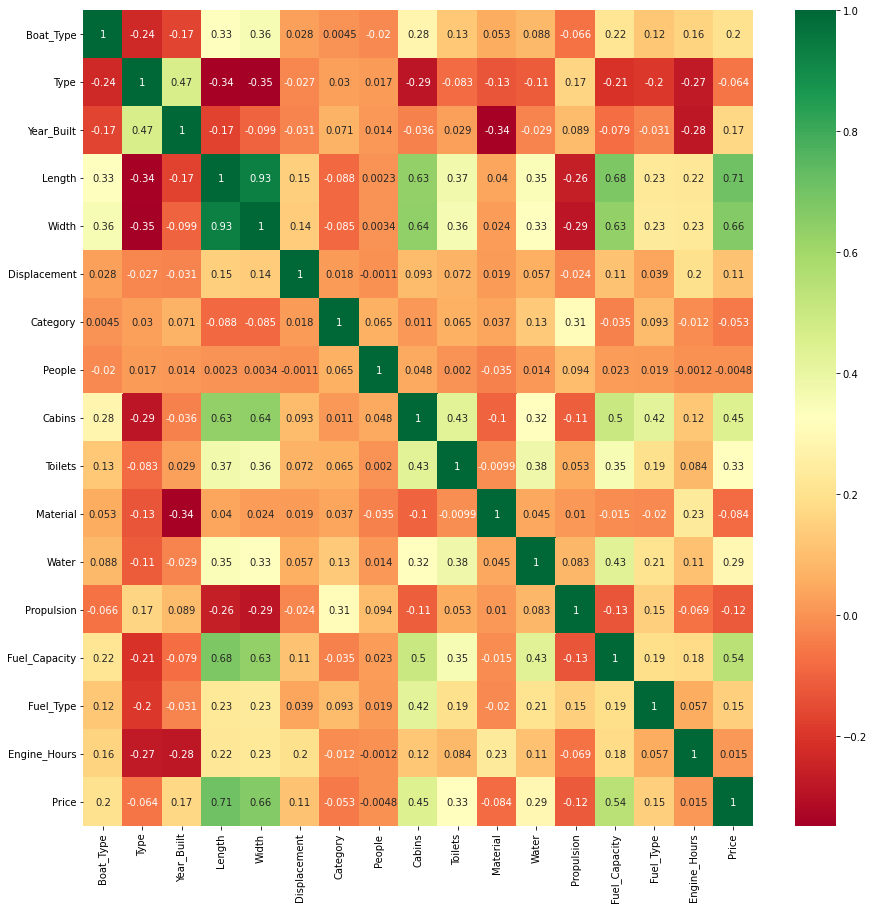

In [7]:
#column correlation
mat = df.corr()
top_features = mat.index
plt.figure(figsize=(15,15))
f = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

<function matplotlib.pyplot.show>

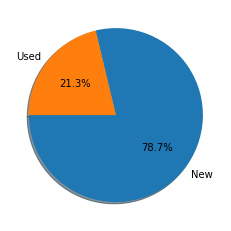

In [8]:
Lab_new = [1.0, 0.0]
val = df['Type'].value_counts().values
val1, val2 = plt.subplots()

val2.pie(val, labels=['New','Used'], autopct='%1.1f%%', shadow=True, startangle=180)
plt.show

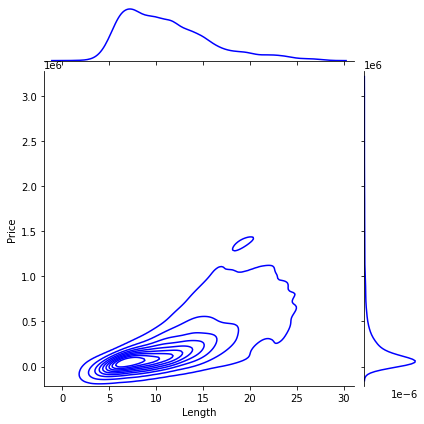

In [9]:
sns.jointplot(x = 'Length', y = 'Price', data=df, color='blue', kind='kde')

# Train/Test/Evaluate

In [10]:
# X = df.drop(['Price'], axis=1)
# #rounding of price to integer
# y = [(round(x)) for x in df['Price']]

In [11]:
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=0)

In [12]:
def model_check(df, model,name,model_number):
  print('******************************* ',name,'-',model_number,' *********************************')
  X = df.drop(['Price'], axis=1)
  y = df.Price
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=10)

  model.fit(X_train, y_train)
  predictions = model.predict(X_valid)
  MAEscore = mean_absolute_error(y_valid, predictions)
 
  plt.figure(figsize=(10,10))
  plt.title(name)
  sns.regplot(y_valid, predictions,fit_reg=True, scatter_kws={"s": 100})
  print('Model score '+"of "+name +" : " + str(model.score(X_valid, y_valid)*100))
  print('MAE score '+"of "+name +" : " + str(MAEscore))
  CVscore=-1*cross_val_score(model, X, y,cv=5,scoring='neg_mean_absolute_error')
  print(CVscore)
  print("Avg 5-Fold CV Score: ","{0:.5f}".format(np.mean(CVscore)/10000))
  return model

# Random Forest Regressor

*******************************  Random Forrest Regressor - 1  *********************************
Model score of Random Forrest Regressor : 88.17847422994728
MAE score of Random Forrest Regressor : 49348.226587774734
[ 18760.19352165 312774.76485885  66654.52650426  29647.07687672
  16303.88627788]
Avg 5-Fold CV Score:  8.88281


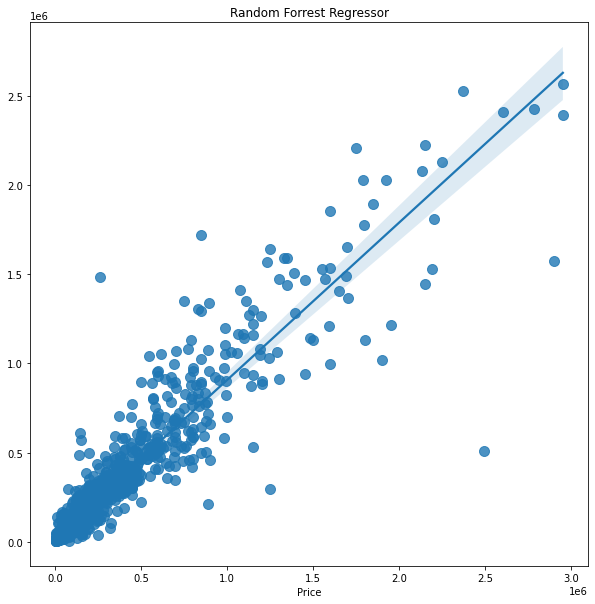

In [13]:
df = data
md1 = model_check(df,RandomForestRegressor(n_estimators=120, random_state=10),'Random Forrest Regressor',1)


# Linear Regression

*******************************  Linear Regression - 2  *********************************
Model score of Linear Regression : 62.70904830231677
MAE score of Linear Regression : 119220.44588732084
[ 84027.84871454 347788.30434031 152237.59068995  87474.67079819
  98890.3867978 ]
Avg 5-Fold CV Score:  15.40838


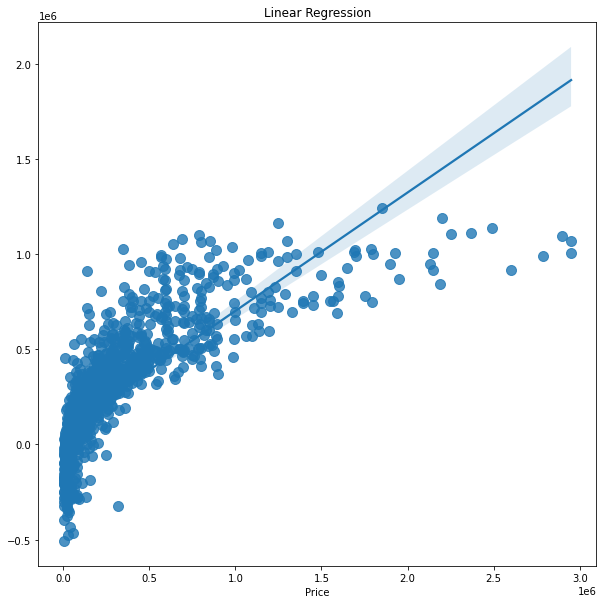

In [14]:
md2 = model_check(df,LinearRegression(),'Linear Regression',2)

# Gradient Boosting Regressor

*******************************  Gradient Boosting Regressor - 3  *********************************
Model score of Gradient Boosting Regressor : 87.75836484687503
MAE score of Gradient Boosting Regressor : 54493.50585466969
[ 24607.97523672 313629.16848937  77594.80665996  34291.45520994
  20921.16167167]
Avg 5-Fold CV Score:  9.42089


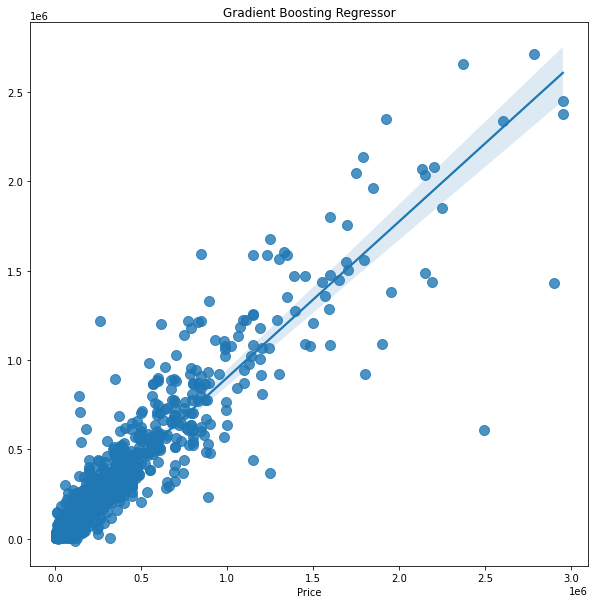

In [15]:
md3 = model_check(df,GradientBoostingRegressor(n_estimators=120, random_state=10),'Gradient Boosting Regressor',3)

# XGB Regressor

*******************************  XGB Regressor - 4  *********************************
[12:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model score of XGB Regressor : 87.65669308506057
MAE score of XGB Regressor : 56176.824272181104
[12:45:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ 27001.48408351 320706.26666939  79084.26264287  34305

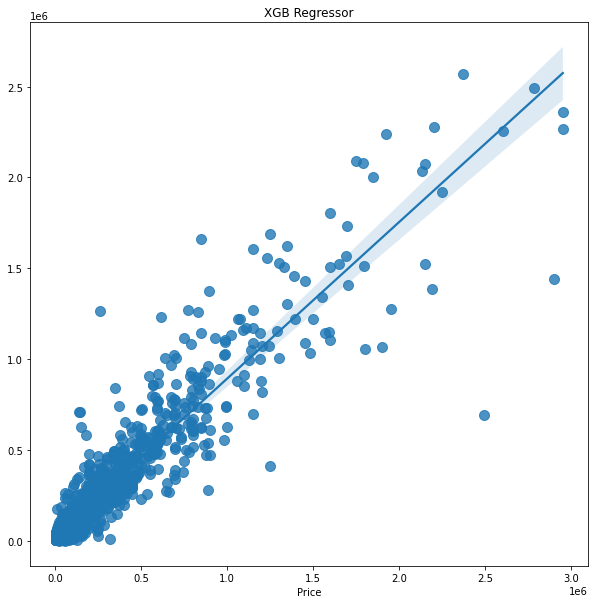

In [16]:
md4 = model_check(df,XGBRegressor(n_estimators=120, learning_rate=0.05),'XGB Regressor',4)

# Train/Test ith outliers removed

In [4]:
df = data
print(df.shape)

def remove_outliers(df):
  #remove outliers Year Built
  df = df[np.abs(df.Year_Built-df.Year_Built.mean())<=(3*df.Year_Built.std())]
  print(df.shape)
  #remove outliers Length
  df = df[np.abs(df.Length-df.Length.mean())<=(3*df.Length.std())]
  print(df.shape)
  return df

df = remove_outliers(df)
print(df.shape)

(9331, 17)
(9191, 17)
(9104, 17)
(9104, 17)


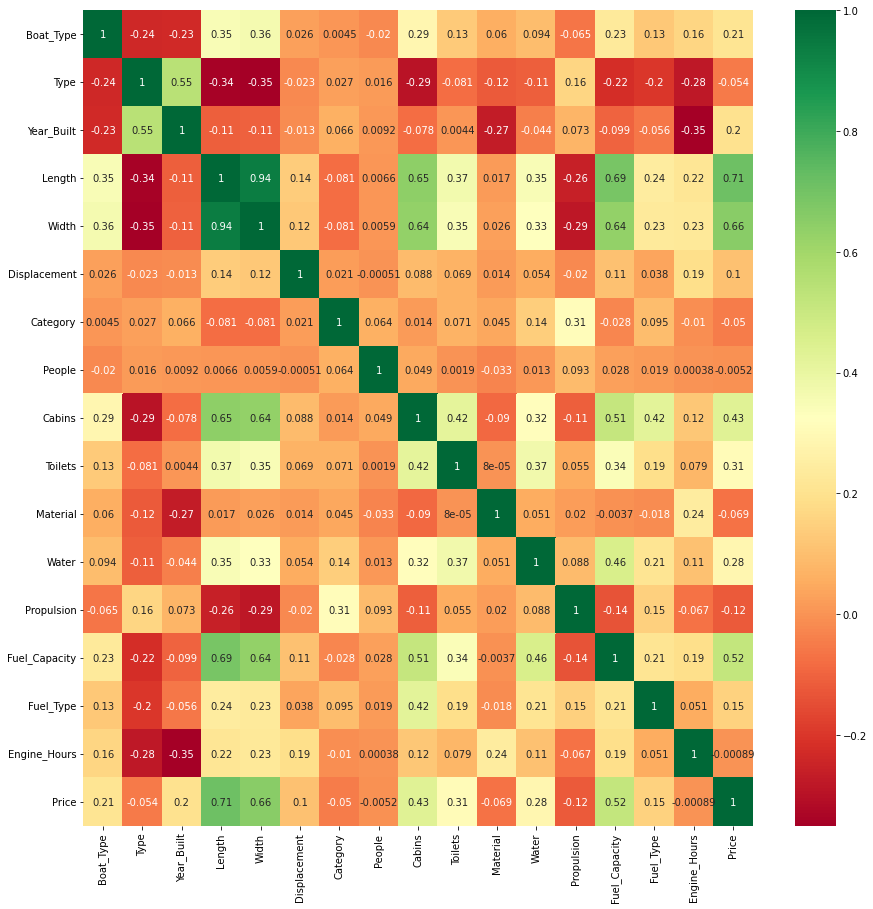

In [18]:
#column correlation
mat = df.corr()
top_features = mat.index
plt.figure(figsize=(15,15))
f = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

*******************************  Random Forrest Regressor - 5  *********************************
Model score of Random Forrest Regressor : 91.97440563514041
MAE score of Random Forrest Regressor : 43660.4669328675
[ 17827.91650759 279834.60421836  66311.08661598  29042.14850076
  15028.64331465]
Avg 5-Fold CV Score:  8.16089


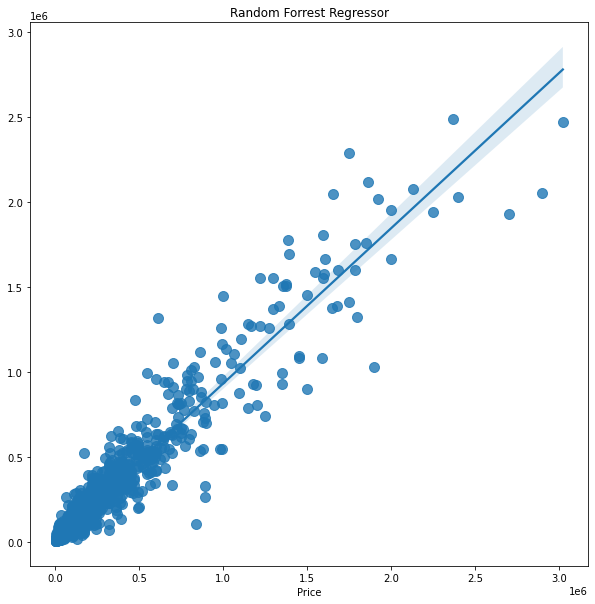

In [19]:
md5 = model_check(df,RandomForestRegressor(n_estimators=120, random_state=10),'Random Forrest Regressor',5)

*******************************  Linear Regression - 6  *********************************
Model score of Linear Regression : 60.161739434717255
MAE score of Linear Regression : 112542.70871733513
[ 81608.17419667 312184.17549914 143453.52164468  83531.12405162
  94453.39512592]
Avg 5-Fold CV Score:  14.30461


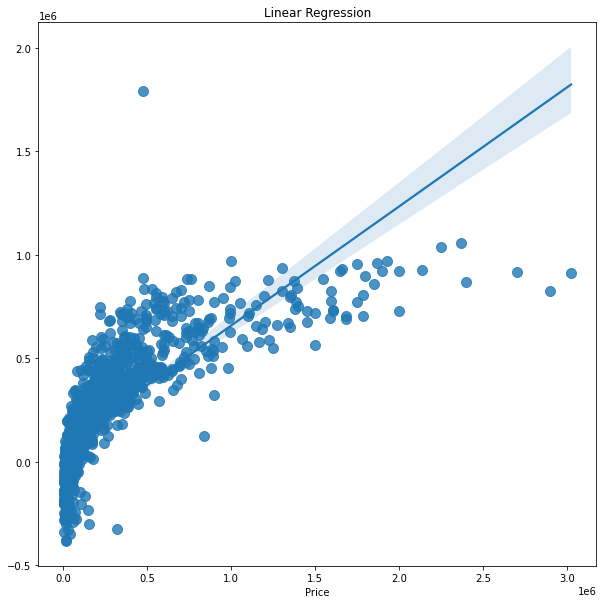

In [20]:
md6 = model_check(df,LinearRegression(),'Linear Regression',6)

*******************************  Gradient Boosting Regressor - 7  *********************************
Model score of Gradient Boosting Regressor : 91.28678967501303
MAE score of Gradient Boosting Regressor : 48524.29053043115
[ 23119.65115682 276530.68286819  74569.1514829   32961.33177271
  19862.82772592]
Avg 5-Fold CV Score:  8.54087


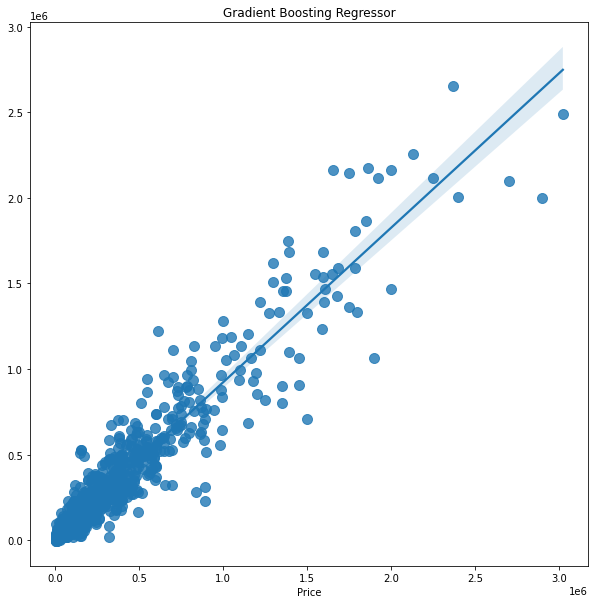

In [21]:
md7 = model_check(df,GradientBoostingRegressor(n_estimators=120, random_state=10),'Gradient Boosting Regressor',7)

*******************************  XGB Regressor - 8  *********************************
[12:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model score of XGB Regressor : 90.6733147645737
MAE score of XGB Regressor : 50216.18906569086
[12:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ 24856.57210595 286561.41042053  76240.45009417  32571.7

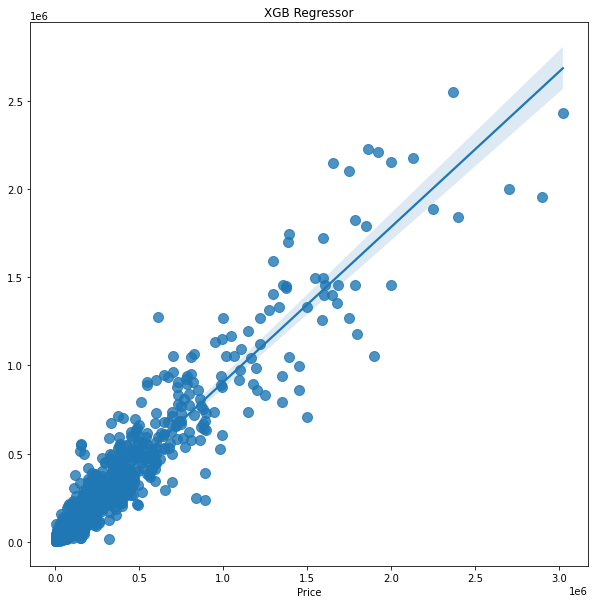

In [22]:
md8 = model_check(df,XGBRegressor(n_estimators=120, learning_rate=0.05),'XGB Regressor',8)

# Train/Test with outliers removed and categorical transformed

In [5]:
def transform(df):
  Boat_Type = pd.get_dummies(df['Boat_Type'], prefix='Boat_Type')
  Type = pd.get_dummies(df['Type'], prefix='Type')
  Material = pd.get_dummies(df['Material'], prefix='Material')
  Propulsion = pd.get_dummies(df['Propulsion'], prefix='Propulsion')
  Fuel_Type = pd.get_dummies(df['Fuel_Type'], prefix='Fuel_Type')
  Category = pd.get_dummies(df['Category'], prefix='Category')
  df_transformed = pd.concat([df,Boat_Type, Type, Material, Propulsion, Fuel_Type, Category], axis=1)
  df_transformed.drop(['Boat_Type','Type','Material','Propulsion','Fuel_Type','Category'], axis=1, inplace=True)
  return df_transformed

In [24]:
df = data
df = remove_outliers(df)
df = transform(df)

(9191, 17)
(9104, 17)


In [25]:
df.head()

,Year_Built,Length,Width,Displacement,People,Cabins,Toilets,Water,Fuel_Capacity,Engine_Hours,Price,Boat_Type_0.0,Boat_Type_1.0,Boat_Type_2.0,Boat_Type_3.0,Boat_Type_4.0,Boat_Type_5.0,Boat_Type_6.0,Type_0.0,Type_1.0,Material_0.0,Material_1.0,Material_2.0,Material_3.0,Material_4.0,Material_5.0,Material_6.0,Material_7.0,Material_8.0,Material_9.0,Material_10.0,Propulsion_0.0,Propulsion_1.0,Propulsion_2.0,Propulsion_3.0,Propulsion_4.0,Propulsion_5.0,Propulsion_6.0,Propulsion_7.0,Fuel_Type_0.0,Fuel_Type_1.0,Fuel_Type_2.0,Fuel_Type_3.0,Fuel_Type_4.0,Fuel_Type_5.0,Category_1.0,Category_2.0,Category_3.0,Category_4.0,Category_5.0
0,2017.0,4.00,1.90,811.7,7.0,0.0,0.0,0.0,0.0,0.0,3118.7,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2020.0,4.00,1.50,150.0,0.0,0.0,0.0,0.0,0.0,0.0,3490.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2020.0,3.00,1.00,110.0,0.0,0.0,0.0,0.0,0.0,0.0,3481.2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1974.0,6.30,2.50,2000.0,0.0,0.0,0.0,0.0,50.0,500.0,3503.5,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2019.0,3.55,1.46,84.0,4.0,0.0,0.0,0.0,0.0,0.0,3399.0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [26]:
df.shape

(9104, 50)

*******************************  Random Forrest Regressor - 9  *********************************
Model score of Random Forrest Regressor : 91.83533321316281
MAE score of Random Forrest Regressor : 43842.32622609971
[ 17652.98692125 278995.02520759  65649.3268288   28834.46973428
  14747.26778379]
Avg 5-Fold CV Score:  8.11758


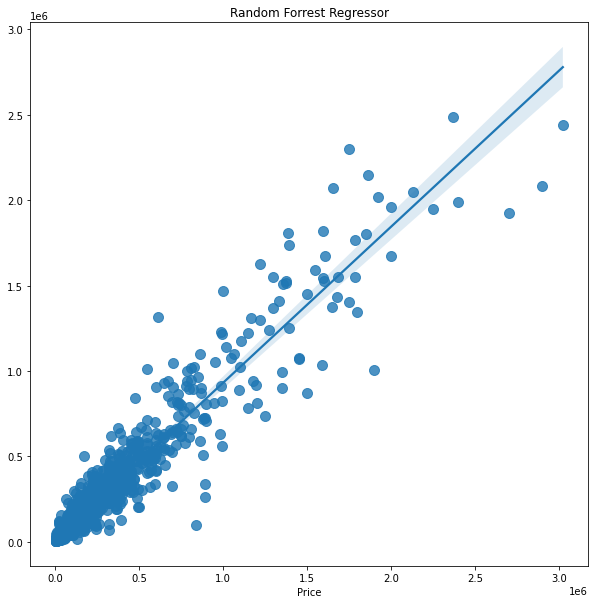

In [27]:
md9 = model_check(df,RandomForestRegressor(n_estimators=120, random_state=10),'Random Forrest Regressor',9)

*******************************  Linear Regression - 10  *********************************
Model score of Linear Regression : 61.534273560247456
MAE score of Linear Regression : 111490.60320478064
[ 82308.04692976 309798.42414505 142468.49968575  82334.06170956
 100269.9120301 ]
Avg 5-Fold CV Score:  14.34358


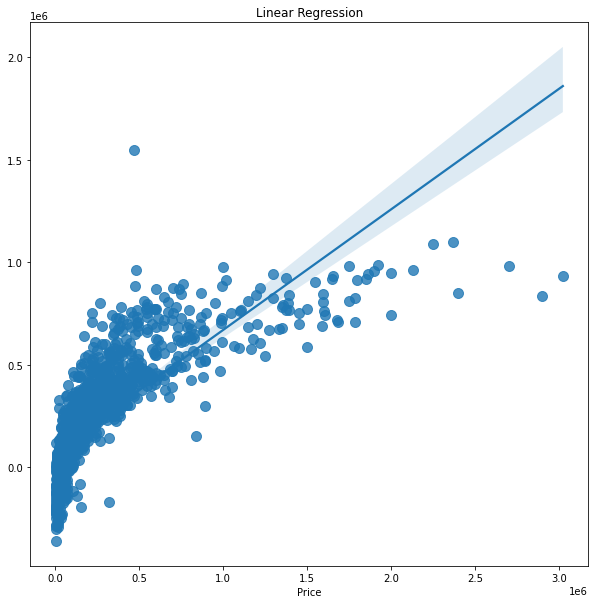

In [28]:
md10 = model_check(df,LinearRegression(),'Linear Regression',10)

*******************************  Gradient Boosting Regressor - 11  *********************************
Model score of Gradient Boosting Regressor : 91.32382007384423
MAE score of Gradient Boosting Regressor : 48432.648370881005
[ 22861.24327605 276585.7226094   74549.32716198  32315.66399387
  19900.86775426]
Avg 5-Fold CV Score:  8.52426


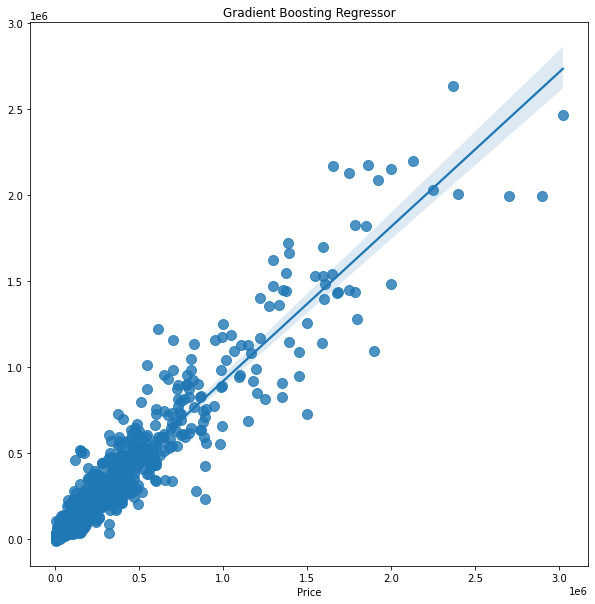

In [29]:
md11 = model_check(df,GradientBoostingRegressor(n_estimators=120, random_state=10),'Gradient Boosting Regressor',11)

*******************************  XGB Regressor - 12  *********************************
[12:47:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model score of XGB Regressor : 90.6939278841491
MAE score of XGB Regressor : 50127.08110122974
[12:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ 24702.90672073 286002.52422368  76590.73714241  32888.

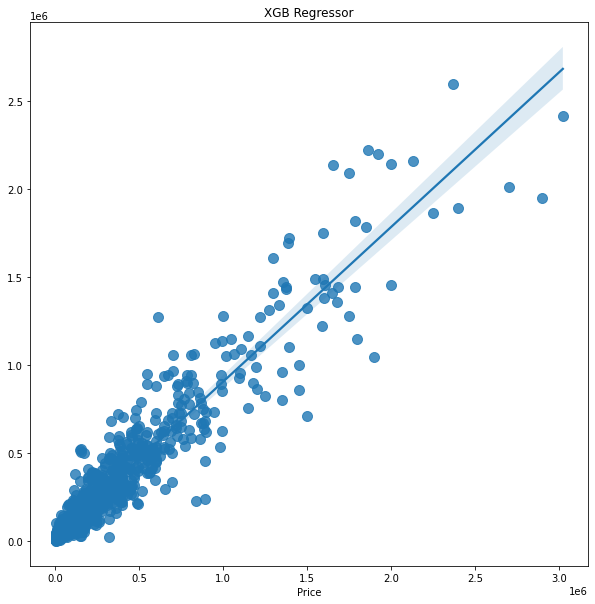

In [30]:
md12 = model_check(df,XGBRegressor(n_estimators=120, learning_rate=0.05),'XGB Regressor',12)

# Train/Test with just Categorical Transformed

In [31]:
df = data
df = transform(df)

*******************************  Random Forrest Regressor - 13  *********************************
Model score of Random Forrest Regressor : 88.14307774219245
MAE score of Random Forrest Regressor : 49219.93346147874
[ 18536.48180053 311499.85615101  66541.16549101  29563.84431722
  15999.50681112]
Avg 5-Fold CV Score:  8.84282


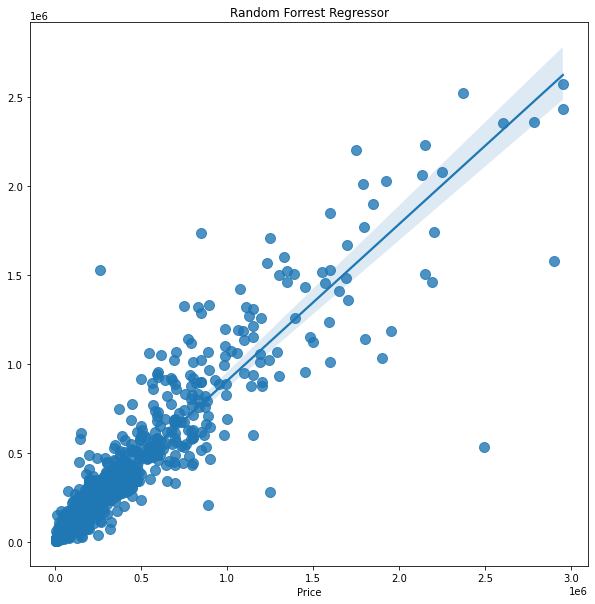

In [32]:
md13 = model_check(df,RandomForestRegressor(n_estimators=120, random_state=10),'Random Forrest Regressor',13)

*******************************  Linear Regression - 14  *********************************
Model score of Linear Regression : 64.0130740235219
MAE score of Linear Regression : 117745.63294104236
[ 83754.51498885 345041.53225366 151170.8471017   86100.33731336
 102907.52050793]
Avg 5-Fold CV Score:  15.37950


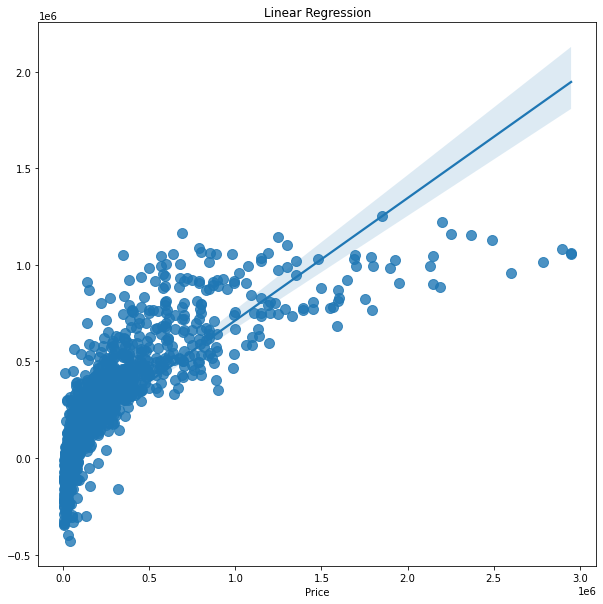

In [33]:
md14 =  model_check(df,LinearRegression(),'Linear Regression',14)

*******************************  Gradient Boosting Regressor - 15  *********************************
Model score of Gradient Boosting Regressor : 87.3459646702635
MAE score of Gradient Boosting Regressor : 54662.425559482734
[ 24216.42665833 312118.23240903  77432.37521646  33098.88635443
  21918.41056566]
Avg 5-Fold CV Score:  9.37569


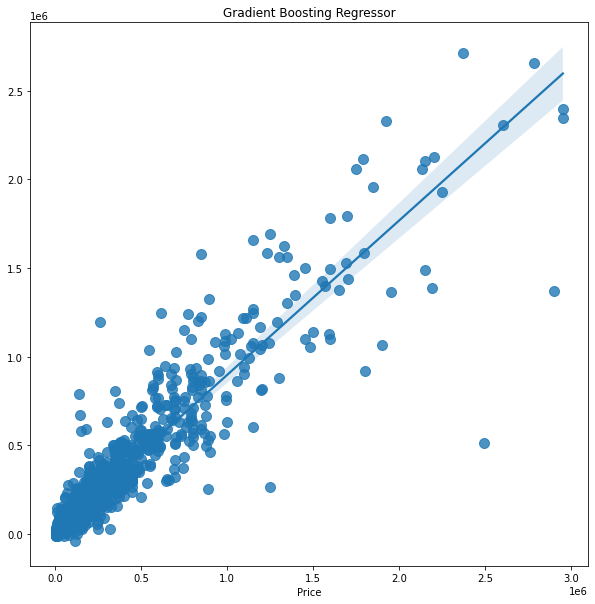

In [34]:
md15 = model_check(df,GradientBoostingRegressor(n_estimators=120, random_state=10),'Gradient Boosting Regressor',15)

*******************************  XGB Regressor - 16  *********************************
[12:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model score of XGB Regressor : 87.39116684627692
MAE score of XGB Regressor : 56123.24061172069
[12:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ 27194.70279756 320848.2108724   79237.52200606  34093

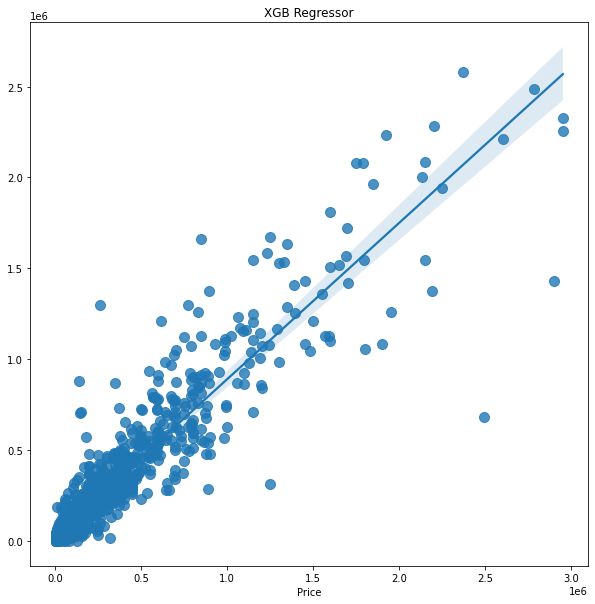

In [35]:
md16 = model_check(df,XGBRegressor(n_estimators=120, learning_rate=0.05),'XGB Regressor',16)

# Best Model Further Improvement

In [18]:
#!!!!! Please note 10+ minutes run on Google Colab!!!!!!!
#Best model is No 9 RFR with CV score of 8.1 on data with outliers removed and data categorical data transformed
df = data
df = remove_outliers(df)
df = transform(df)
model = RandomForestRegressor()
name = 'Random Forrest Regressor'
number = 9

#change function for best model to further improve
def best_model_check(df, model,name,model_number):
  print('******************************* ',name,'-',model_number,' *********************************')
  X = df.drop(['Price'], axis=1)
  y = df.Price
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=10)

  #Number of trees
  n_est=[int(x) for x in np.linspace(start = 60, stop = 240, num = 10)]
  #Features to consider
  max_feat=['auto', 'sqrt']
  #Max No of levels in tree
  max_d=[int(x) for x in np.linspace(10, 110, num = 11)]
  #Min No of samples
  min_ss=[2, 5, 10]
  #Min No of samples at leaf node
  min_sl=[1, 2, 4]
  #Method samples for training
  bs=[True, False]

  # Create the random grid
  random_grid={'n_estimators': n_est,
                'max_features': max_feat,
                'max_depth': max_d,
                'min_samples_split': min_ss,
                'min_samples_leaf': min_sl,
                'bootstrap': bs}

  rf_ran=RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, 
                                 cv = 3, verbose=2, random_state=42, n_jobs = -1)             
  rf_ran.fit(X_train, y_train)
 
  print(rf_ran.best_params_)
  return model

best_model_check(df, model, name,number)


(9191, 17)
(9104, 17)
*******************************  Random Forrest Regressor - 9  *********************************
Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}


RandomForestRegressor()

(9191, 17)
(9104, 17)
*******************************  Random Forrest Regressor - 9  *********************************
Model score of Random Forrest Regressor : 91.98821450795359
MAE score of Random Forrest Regressor : 43645.150937700106
[ 17692.67758478 279012.3061931   65908.19496283  28876.54121612
  14799.40060466]
Avg 5-Fold CV Score:  8.12578


RandomForestRegressor(max_depth=60, min_samples_split=5, random_state=10)

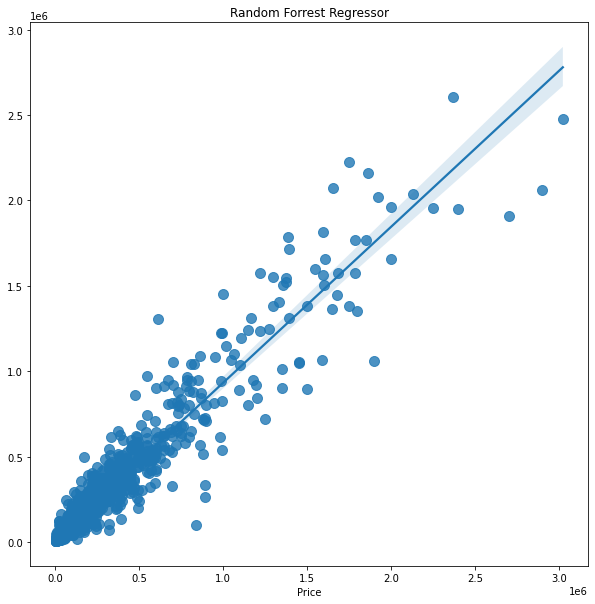

In [21]:
#now lets check this in default function
df = data
df = remove_outliers(df)
df = transform(df)
model = RandomForestRegressor(n_estimators=100, min_samples_split= 5, min_samples_leaf=1, max_features='auto', max_depth=60, bootstrap=True, random_state=10)
name = 'Random Forrest Regressor'
number = 9

def best_model_improved(df, model,name,number):
  print('******************************* ',name,'-',number,' *********************************')
  X = df.drop(['Price'], axis=1)
  y = df.Price
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=10)

  model.fit(X_train, y_train)
  predictions = model.predict(X_valid)
  MAEscore = mean_absolute_error(y_valid, predictions)
 
  plt.figure(figsize=(10,10))
  plt.title(name)
  sns.regplot(y_valid, predictions,fit_reg=True, scatter_kws={"s": 100})
  print('Model score '+"of "+name +" : " + str(model.score(X_valid, y_valid)*100))
  print('MAE score '+"of "+name +" : " + str(MAEscore))
  CVscore=-1*cross_val_score(model, X, y,cv=5,scoring='neg_mean_absolute_error')
  print(CVscore)
  print("Avg 5-Fold CV Score: ","{0:.5f}".format(np.mean(CVscore)/10000))
  return model

best_model_improved(df, model,name,number)

In [ ]:
#no benefit detected from using grid search, CV result is same

# Improve Linear Regression model for code generation

In [36]:
df = data
print(df.shape)

def remove_outliers_LR(df):
  #remove outliers Price
  df = df[np.abs(df.Price-df.Price.mean())<=(3*df.Price.std())]  
  print(df.shape)
  #remove outliers Width
  df = df[np.abs(df.Width-df.Width.mean())<=(3*df.Width.std())]
  print(df.shape)
  #remove outliers Length
  df = df[np.abs(df.Length-df.Length.mean())<=(3*df.Length.std())]
  print(df.shape)
   #remove outliers People
  df = df[np.abs(df.People-df.People.mean())<=(3*df.People.std())]
  print(df.shape)
  #remove outliers Engine_Hours
  df = df[np.abs(df.Engine_Hours-df.Engine_Hours.mean())<=(3*df.Engine_Hours.std())]
  print(df.shape)
  #remove outliers Cabins
  df = df[np.abs(df.Cabins-df.Cabins.mean())<=(3*df.Cabins.std())]
  print(df.shape)
  #remove outliers Fuel_Capacity
  df = df[np.abs(df.Fuel_Capacity-df.Fuel_Capacity.mean())<=(3*df.Fuel_Capacity.std())]
  print(df.shape)
  #remove outliers Displacement
  df = df[np.abs(df.Displacement-df.Displacement.mean())<=(3*df.Displacement.std())]
  print(df.shape)
  #remove outliers Year Built
  df = df[np.abs(df.Year_Built-df.Year_Built.mean())<=(3*df.Year_Built.std())]
  print(df.shape)
  #remove outliers Water
  df = df[np.abs(df.Water-df.Water.mean())<=(3*df.Water.std())]
  print(df.shape)
  #remove outliers Price
  df = df[np.abs(df.Price-df.Price.mean())<=(3*df.Price.std())]  
  print(df.shape)
  


  return df

(9331, 17)


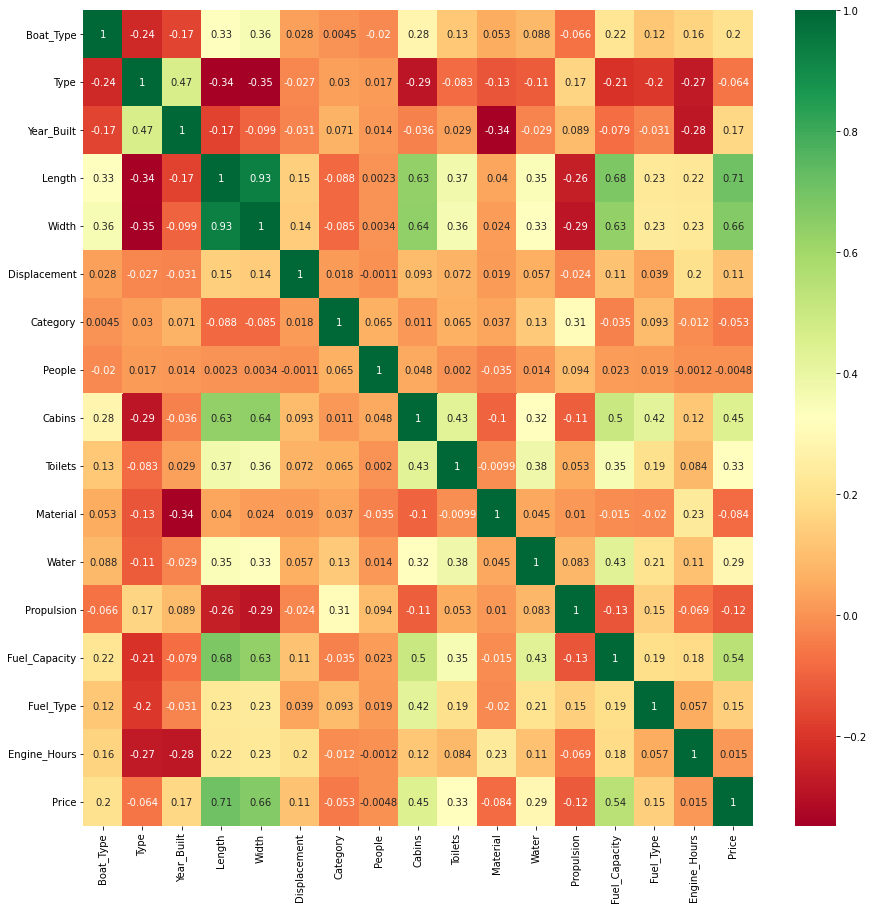

In [37]:
#column correlation
mat = df.corr()
top_features = mat.index
plt.figure(figsize=(15,15))
f = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [38]:

def model_improveLR(df, model, name):
  print('******************************* ',name,' *********************************')
  df = remove_outliers_LR(df)
  df = transform(df)
  X = df[['Year_Built', 	'Length', 	'Width', 	'Boat_Type_0.0', 	'Boat_Type_1.0', 	'Boat_Type_2.0', 	'Boat_Type_3.0', 	'Boat_Type_4.0', 	'Boat_Type_5.0', 	'Boat_Type_6.0', 'Fuel_Type_0.0', 	'Fuel_Type_1.0', 	'Fuel_Type_2.0', 	'Fuel_Type_3.0', 	'Fuel_Type_4.0', 	'Fuel_Type_5.0'	]]
  #in order to avoid negative predictions log is used on target values when training model
  y = [(np.log(x)) for x in df['Price']]
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=10)
  model.fit(X_train, y_train)

  predictions = model.predict(X_valid)
  MAEscore = mean_absolute_error(y_valid, predictions)

  plt.figure(figsize=(10,10))
  plt.title(name)
  sns.regplot(y_valid, predictions,fit_reg=True, scatter_kws={"s": 100})

  print('Model score '+"of "+name +" : " + str(model.score(X_valid, y_valid)*100))
  print('MAE score '+"of "+name +" : " + str(MAEscore))
  CVscore=-1*cross_val_score(model, X, y,cv=5, scoring='neg_mean_absolute_error')
  #make CV score more comparable to other models
  CVscore=CVscore*df['Price'].max()/10000
  print(CVscore)
  print("Average 5-Fold CV Score: ","{0:.5f}".format(np.mean(CVscore)))
  return model

*******************************  Linear Regression  *********************************
(9098, 17)
(9076, 17)
(8985, 17)
(8983, 17)
(8840, 17)
(8810, 17)
(8645, 17)
(8641, 17)
(8526, 17)
(8298, 17)
(8075, 17)
Model score of Linear Regression : 80.04738714864276
MAE score of Linear Regression : 0.35269669853906277
[26.43839731 30.17078869 28.10998262 20.25048535 37.6273442 ]
Average 5-Fold CV Score:  28.51940


LinearRegression()

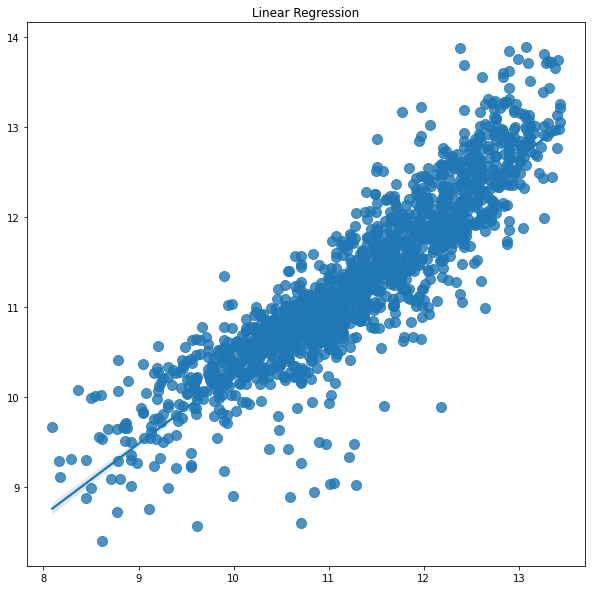

In [39]:
df = data
model = LinearRegression()
name = 'Linear Regression'
model_improveLR(df, model, name)


# Model to Code Generator

In [44]:
pip install m2cgen

In [45]:
import m2cgen as m2c 

*******************************  Linear Regression  *********************************
(9098, 17)
(9076, 17)
(8985, 17)
(8983, 17)
(8840, 17)
(8810, 17)
(8645, 17)
(8641, 17)
(8526, 17)
(8298, 17)
(8075, 17)
Model score of Linear Regression : 80.04738714864276
MAE score of Linear Regression : 0.35269669853906277
[26.43839731 30.17078869 28.10998262 20.25048535 37.6273442 ]
Average 5-Fold CV Score:  28.51940


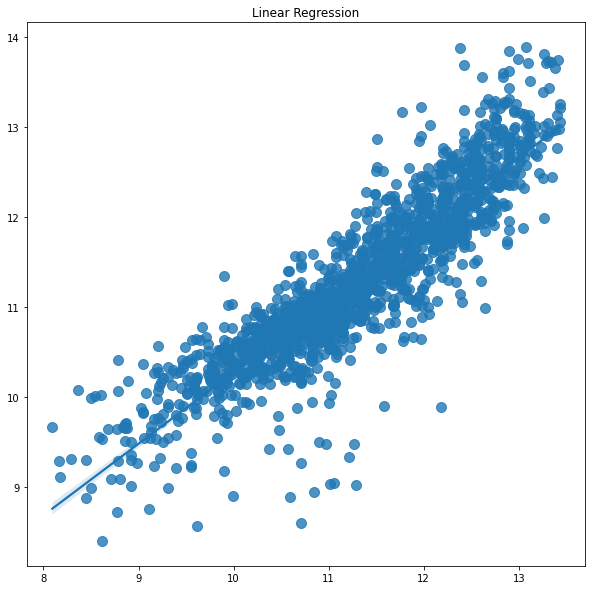

In [46]:
df = data
model = LinearRegression()
name = 'Linear Regression'
#model is exported to Java code using m2cgen
model_to_java = m2c.export_to_java(model_improveLR(df, model, name)) 

In [47]:
#generated code is saved into the text file
with open("Boat_Price_Predict_model.txt", "w") as text_file:
    text_file.write(model_to_java)

In [48]:
#generated java code
# public class Model {
#     public static double score(double[] input) {
#         return ((((((((((((((((-59.41473695747893) + ((input[0]) * (0.03388162295782835))) + ((input[1]) * (0.18937054159865566))) + ((input[2]) * (0.2652399064351538))) + ((input[3]) * (0.02695870137383033))) + ((input[4]) * (0.02247125462862746))) + ((input[5]) * (0.07440626140876394))) + ((input[6]) * (0.20201740237369228))) + ((input[7]) * (-0.008975037270257995))) + ((input[8]) * (0.035744149584928823))) + ((input[9]) * (-0.35262273209958483))) + ((input[10]) * (-0.24273505793530623))) + ((input[11]) * (-0.1519973266786563))) + ((input[12]) * (0.3578182572109012))) + ((input[13]) * (-0.046416251892144905))) + ((input[14]) * (-0.060179928171620725))) + ((input[15]) * (0.14351030746682686));
#     }
# }